## Importing the libraries

In [253]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Loading the dataset

In [254]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [255]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [256]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [257]:
# Putting feature variable to X
X = dataset.drop(columns=['User ID','Gender','Purchased'],axis=1)

# Putting response variable to y
y = dataset[['Purchased']]

In [258]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


## Print count of each label in Purchased column

In [259]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [260]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [261]:

dataset['Purchased'] = dataset['Purchased'].astype('category')
dataset['Purchased'].head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: category
Categories (2, int64): [0, 1]

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



## Train the model with random_state = 0

In [263]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [264]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     Purchased
132          0
309          0
341          0
196          0
246          0
60           0
155          0
261          1
141          0
214          0
37           0
134          0
113          0
348          0
12           0
59           0
293          0
140          0
206          1
199          0


## Print the prediction results

In [265]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [266]:
test_dataset=pd.DataFrame({'Age':X_test.Age, 'EstimatedSalary':X_test.EstimatedSalary, 
                                  'Actual_Purchased':y_test.Purchased, 'Predict_Purchased':y_pred})
test_dataset

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


## Print Confusion Matrix and classification_report

In [267]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



In [268]:
print(confusion_matrix(y_test,y_pred))


[[68  0]
 [32  0]]


In [269]:
print(accuracy_score(y_test,y_pred))

0.68


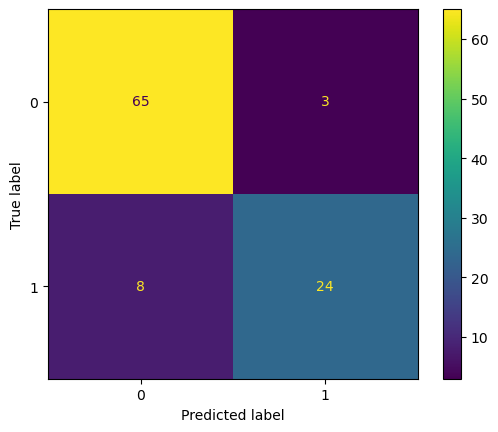

In [270]:
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logmodel.classes_)
disp.plot()
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [271]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [272]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


In [273]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [274]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [275]:

# Q3: Predicting a new result - e.g: person with Age = 30 and Salary = 90,000
new_data_2 = np.array([[30, 90000]])

prediction_2 = classifier.predict(new_data_2)
print("Prediction for Age = 30 and Salary = 90,000:", prediction_2)


Prediction for Age = 30 and Salary = 90,000: [1]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [276]:

new_data_3 = np.array([[40, 90000]])

prediction_4 = classifier.predict(new_data_2)
print("Prediction for Age = 40 and Salary = 90,000:", prediction_2)


Prediction for Age = 40 and Salary = 90,000: [1]
